<a href="https://colab.research.google.com/github/lklmkv/tvp1t/blob/main/Data_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA ENCODING**

To work with features, it is necessary to **encode** categorical features - a procedure that represents some transformation of categorical features into a numerical representation according to some previously specified rules.

**About dataset**

This is the raw data file, straight from the survey collected. You can see some responses on "what year were you in last year" have been left blank which indicates that the students previous year of study was not in university but rather high school. Since the point of the model is to be based on university students, these observations that have been left blank will be removed so that only students who were in university in 2023 and onwards are taken into consideration.

First of all, let's load the data and see the main information about dataset.

In [239]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Stats survey.csv')
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          406 non-null    object 
 1   Your Sex?                                                                                          404 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64
 3   What year were you in last year (2023) ?                                                           333 non-null    object 
 4   What faculty does your degree fall under?                                                          399 non-null    object 

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair
5,2024/03/07 5:13:18 pm EET,Male,83.0,NaN,Engineering,NaN,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,8+,4+,3-5,3,1,Yes,Yes,Very close
6,2024/03/07 5:13:22 pm EET,Male,80.0,2nd Year,Economic & Management Sciences,54.0,Private accommodation/ stay with family/friends,R 5001 - R 6000,No,8+,2,5-8,1,0,No,Yes,Very close
7,2024/03/07 5:13:26 pm EET,Female,85.0,2nd Year,Arts & Social Sciences,75.0,Private accommodation/ stay with family/friends,R 5001 - R 6000,No,3-5,3,3-5,2,0,Yes,Yes,Very close
8,2024/03/07 5:13:28 pm EET,Male,89.0,NaN,Engineering,NaN,NaN,R 5001 - R 6000,No,8+,Only weekends,3-5,0,NaN,No,Yes,Very close
9,2024/03/07 5:13:35 pm EET,Male,83.0,NaN,Science,NaN,NaN,R 6001 - R 7000,No,3-5,3,5-8,4+,0,No,Yes,Close


Here we can see that dataset includes 17 features and only 2 of them are numeric.

Let's make a descriptive statistics table to see which values we will deal with.

In [240]:
df.describe(include='all')

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
count,406,404,399.000000,333,399,320.000000,383,375,398,403,404,404,403,403,403,402,403
unique,400,2,NaN,5,8,NaN,2,5,2,5,6,5,5,5,2,2,4
top,2024/03/07 8:07:03 pm EET,Male,NaN,2nd Year,Economic & Management Sciences,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,5-8,0,0,No,Yes,Very close
freq,2,216,NaN,153,211,NaN,335,159,352,114,113,111,214,263,239,353,269
mean,NaN,NaN,77.989724,NaN,NaN,66.268469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,7.048618,NaN,NaN,9.147906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,34.000000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,74.000000,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,78.000000,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,83.000000,NaN,NaN,73.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The 'unique' row includes the number of unique values for each feature. In our case, we can see that object-typed features are cathegorical and can be encoded in different ways.

Also, we can see that the feature 'Timestamp' is non-informative, and we can drop it without data quality loss.

In [241]:
df=df.drop(columns='Timestamp')

Let's work with categorical features one by one. First is the 'Your Sex?' column. It is a binary-typed feature, and we can encode it with label encoding.

In [242]:
labelencoder = LabelEncoder()
data_new = labelencoder.fit_transform(df[ 'Your Sex?'].values)
df[ 'Your Sex?']=data_new

'What year were you in last year (2023)?' is an object-typed feature, but it includes information about the study year that is numeric. We can replace strings with integer numbers. Gapes will fill in with 0 because the missing value tells us that the student is in their first year now.

In [243]:
df['What year were you in last year (2023) ?'] = df['What year were you in last year (2023) ?'].fillna(0)
df['What year were you in last year (2023) ?'] = df['What year were you in last year (2023) ?'].replace({'2nd Year': 2,
                                                                                                         '1st Year': 1,
                                                                                                         '3rd Year': 3,
                                                                                                         '4th Year': 4,
                                                                                                         'Postgraduate': 5})
df['What year were you in last year (2023) ?'].value_counts()

What year were you in last year (2023) ?
2    153
1    128
0     73
3     40
4      7
5      5
Name: count, dtype: int64

In [244]:
df1=pd.get_dummies(df['What faculty does your degree fall under?'], prefix='faculty')
df=df.drop(columns='What faculty does your degree fall under?')
df = pd.concat([df, df1], axis=1)

In [245]:
df['Your Accommodation Status Last Year (2023)']=df['Your Accommodation Status Last Year (2023)'].fillna(0)
df['Your Accommodation Status Last Year (2023)'] = df['Your Accommodation Status Last Year (2023)'].replace(
    {'Non-private accommodation ie. Res': 1, 'Private accommodation/ stay with family/friends': 2})

In [246]:
df['Monthly Allowance in 2023'] = df['Monthly Allowance in 2023'].replace(
    {'R 4001- R 5000': 1,
     'R 5001 - R 6000': 2,
     'R 6001 - R 7000': 3,
     'R 7001 - R 8000': 4,
     'R 8000+': 5})

In [247]:
data_new = labelencoder.fit_transform(df[ 'Were you on scholarship/bursary in 2023?'].values)
df[ 'Were you on scholarship/bursary in 2023?']=data_new

In [248]:
df['Additional amount of studying (in hrs) per week'].value_counts()
df['Additional amount of studying (in hrs) per week'] = df['Additional amount of studying (in hrs) per week'].replace(
    {'1-3': 1,
     '3-5': 2,
     '5-8': 3,
     '8+': 4,
     '0': 0}
)


In [249]:
df['How often do you go out partying/socialising during the week? '].value_counts()
df['How often do you go out partying/socialising during the week? ']=df['How often do you go out partying/socialising during the week? '].replace(
    {'4+': 4,
     'Only weekends': 0.5,
     '1': 1,
     '2': 2,
     '3': 3,
     '0': 0}
)


In [250]:
df['On a night out, how many alcoholic drinks do you consume?'].value_counts()
df['On a night out, how many alcoholic drinks do you consume?']=df['On a night out, how many alcoholic drinks do you consume?'].replace(
    {'0': 0,
     '1-3': 1,
     '3-5': 2,
     '5-8': 3,
     '8+': 4}
)


In [251]:
df['How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)'].value_counts()
df['How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)'] = df['How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)'].replace(
    {'0': 0,
     '1': 1,
     '2': 2,
     '3': 3,
     '4+': 4}
)

In [252]:
df['How many modules have you failed thus far into your studies?'].value_counts()
df['How many modules have you failed thus far into your studies?']=df['How many modules have you failed thus far into your studies?'].replace(
    {'0': 0,
     '1': 1,
     '2': 2,
     '3': 3,
     '4+': 4}
)

In [253]:
data_new = labelencoder.fit_transform(df[ 'Are you currently in a romantic relationship?'].values)
df[ 'Are you currently in a romantic relationship?']=data_new

In [254]:
data_new = labelencoder.fit_transform(df[ 'Do your parents approve alcohol consumption?'].values)
df[ 'Do your parents approve alcohol consumption?']=data_new
print(df['Do your parents approve alcohol consumption?'].value_counts())

Do your parents approve alcohol consumption?
1    353
0     49
2      4
Name: count, dtype: int64


In [255]:
mode=df.mode()
df['How strong is your relationship with your parent/s?']=df['How strong is your relationship with your parent/s?'].fillna(4)
df['How strong is your relationship with your parent/s?']=df['How strong is your relationship with your parent/s?'].replace(
    {'Distant': 1,
     'Fair': 2,
     'Close': 3,
     'Very close': 4}
)
df['How strong is your relationship with your parent/s?'].value_counts()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 23 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Your Sex?                                                                                          406 non-null    int64  
 1   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64
 2   What year were you in last year (2023) ?                                                           406 non-null    int64  
 3   Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                 320 non-null    float64
 4   Your Accommodation Status Last Year (2023)                                                         406 non-null    int64  

array([[<Axes: title={'center': 'Your Sex?'}>,
        <Axes: title={'center': 'Your Matric (grade 12) Average/ GPA (in %)'}>,
        <Axes: title={'center': 'What year were you in last year (2023) ?'}>,
        <Axes: title={'center': 'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)'}>],
       [<Axes: title={'center': 'Your Accommodation Status Last Year (2023)'}>,
        <Axes: title={'center': 'Monthly Allowance in 2023'}>,
        <Axes: title={'center': 'Were you on scholarship/bursary in 2023?'}>,
        <Axes: title={'center': 'Additional amount of studying (in hrs) per week'}>],
       [<Axes: title={'center': 'How often do you go out partying/socialising during the week? '}>,
        <Axes: title={'center': 'On a night out, how many alcoholic drinks do you consume?'}>,
        <Axes: title={'center': 'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)'}>,
        <Axes: title={'center': 'How 

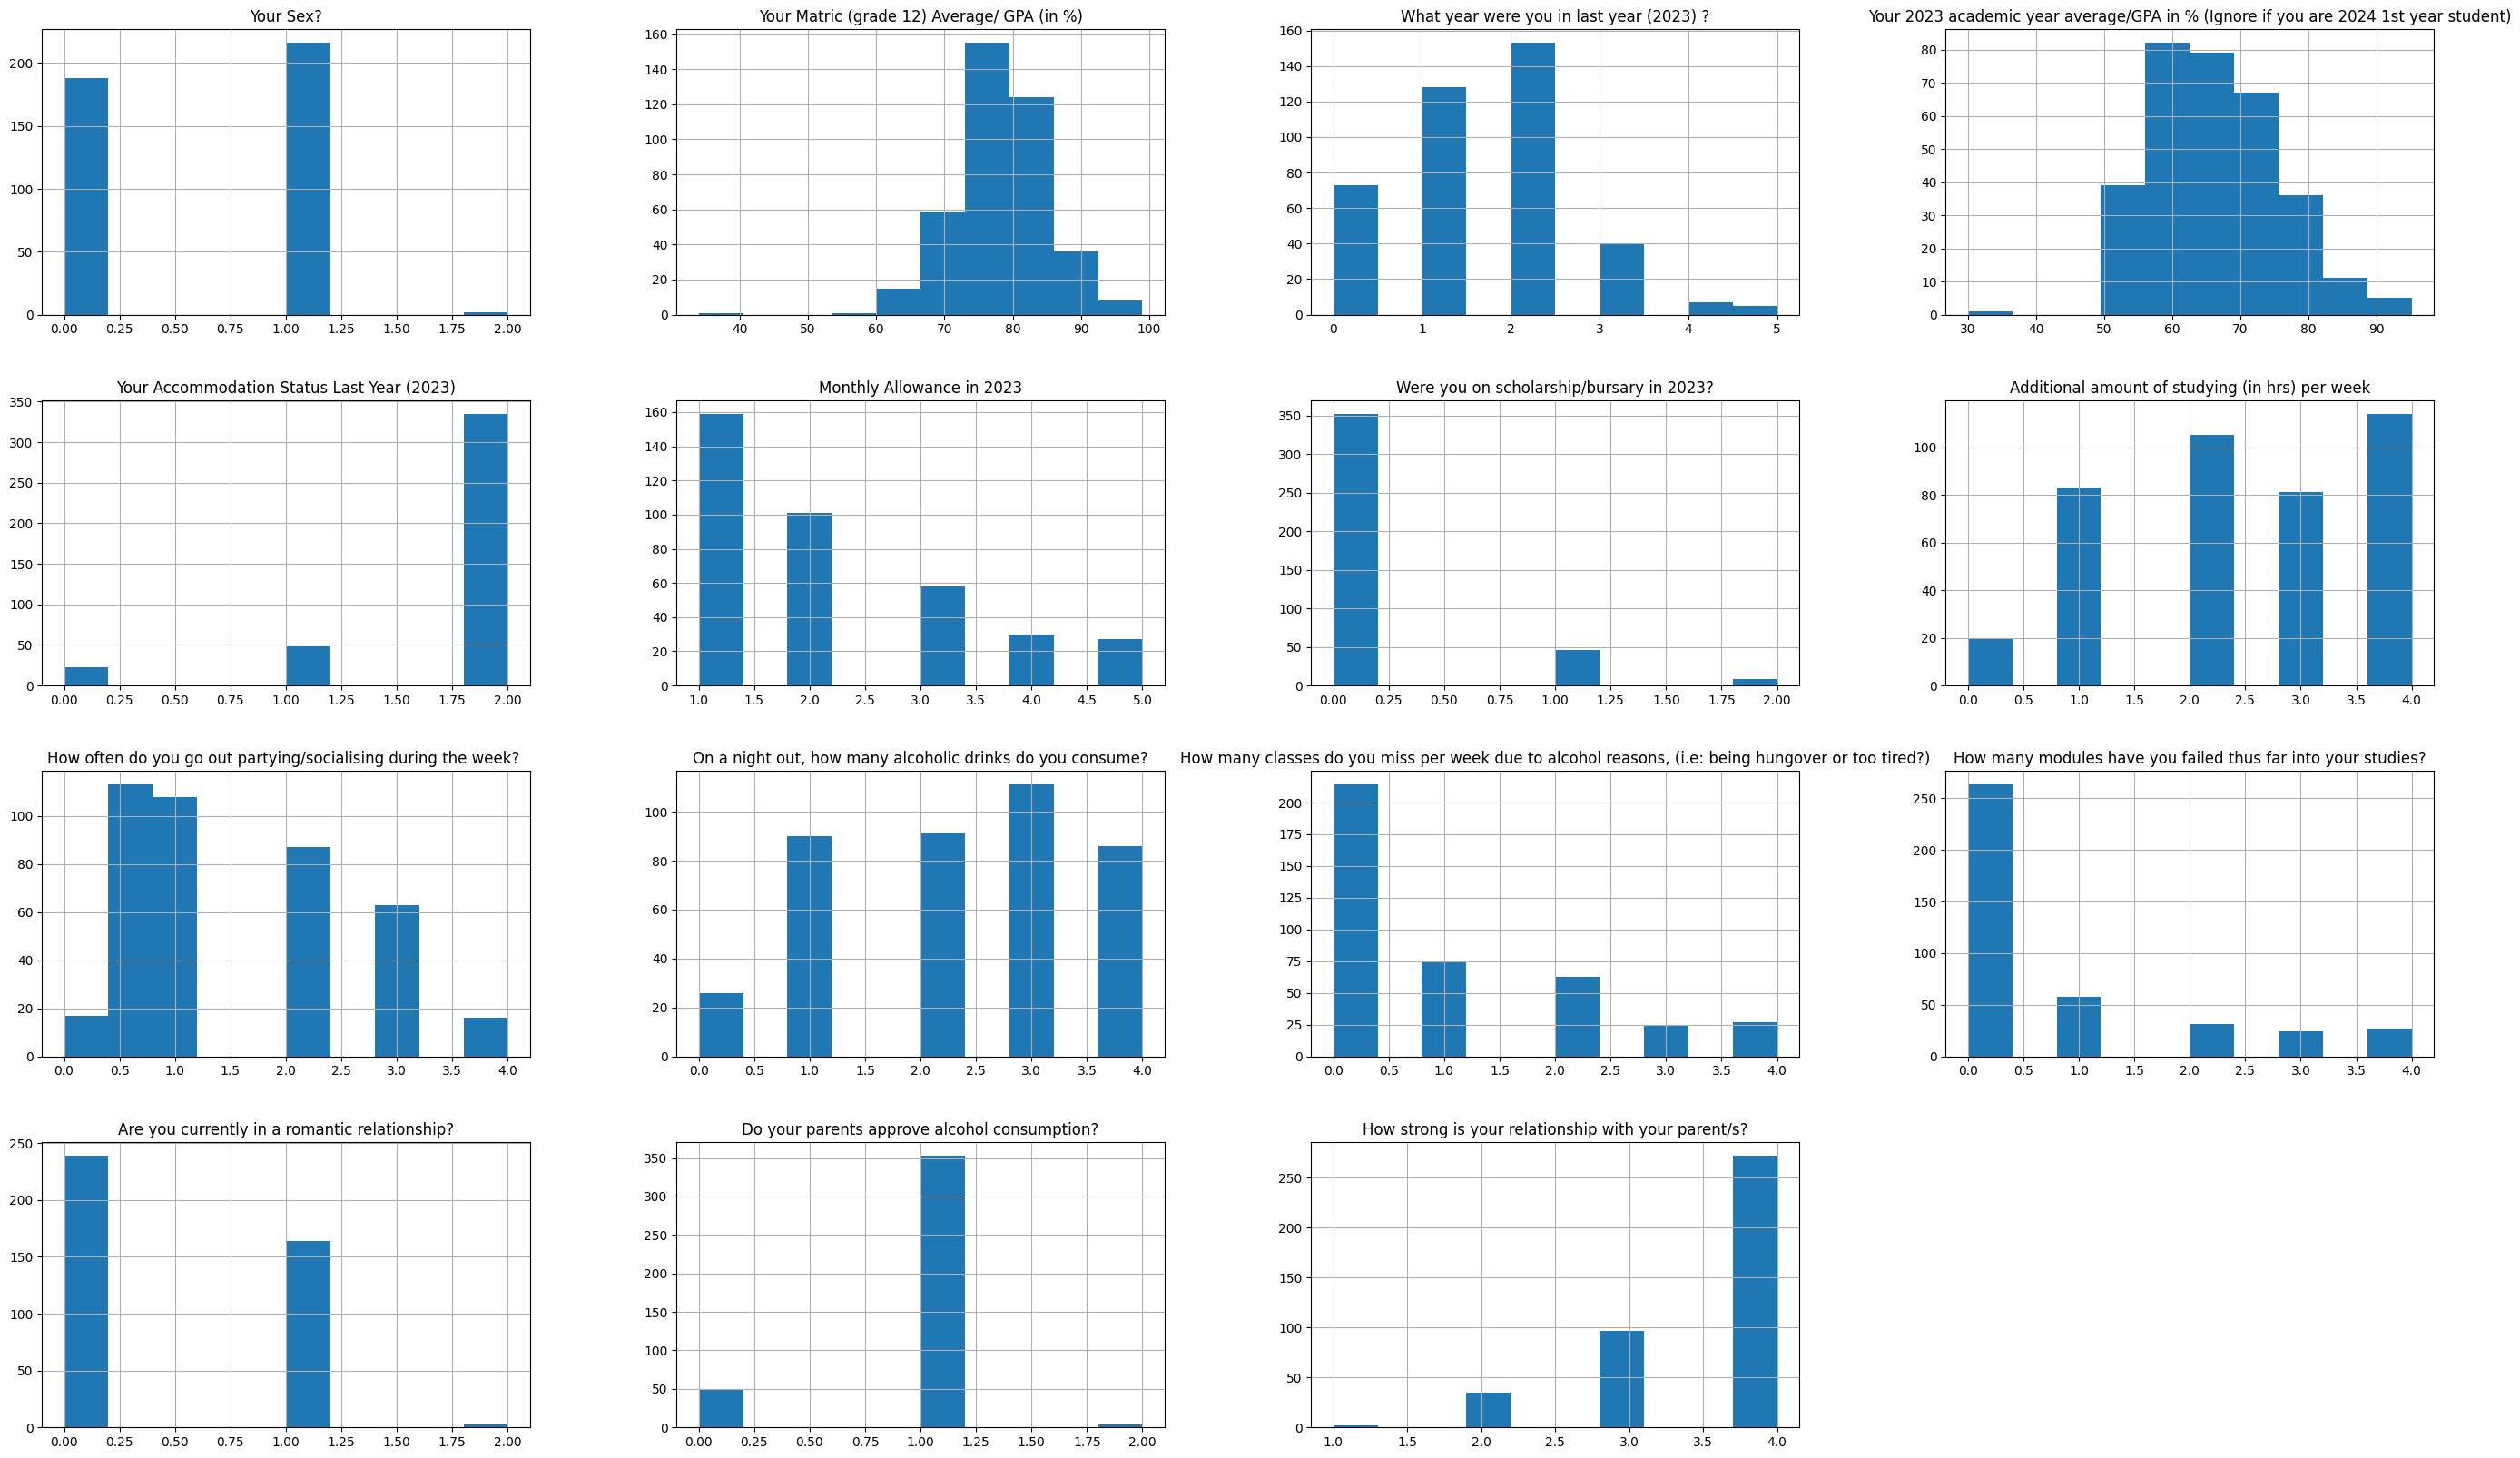

In [258]:
df.hist(figsize = (34, 20))